# right_cerebrum
## sub001_sess1

In [1]:
import nighres
import os

skip_plots = False
try:
    from nilearn import plotting
except ImportError:
    skip_plots = True
    print('Nilearn could not be imported, plotting will be skipped')


in_dir = os.path.join(os.getcwd(), 'nighres_examples/tissue_classification')
out_dir = os.path.join(os.getcwd(), 'nighres_examples/cortical_depth_estimation')

segmentation = os.path.join(in_dir, 'sub001_sess1_mgdm-seg.nii.gz')
boundary_dist = os.path.join(in_dir, 'sub001_sess1_mgdm-dist.nii.gz')
max_labels = os.path.join(in_dir, 'sub001_sess1_mgdm-lbls.nii.gz')
max_probas = os.path.join(in_dir, 'sub001_sess1_mgdm-mems.nii.gz')

### Region Extraction

In [2]:
cortex = nighres.brain.extract_brain_region(segmentation=segmentation,
                                            levelset_boundary=boundary_dist,
                                            maximum_membership=max_probas,
                                            maximum_label=max_labels,
                                            extracted_region='right_cerebrum',
                                            save_data=True,
                                            file_name='sub001_sess1_right_cerebrum',
                                            output_dir=out_dir)


Extract Brain Region

Outputs will be saved to /home/cons/python/nighres_examples/cortical_depth_estimation/
Load atlas
loading atlas file: /home/cons/.local/lib/python3.8/site-packages/nighres/atlases/brain-segmentation-prior3.0/brain-atlas-3.0.3.txt
Structures 
Background (mask)	1
Dura (wm)	50
Arteries (wm)	8
Sulcal-CSF (csf)	10
VentricleL (csf)	11
VentricleR (csf)	12
Ventricle3 (csf)	13
Ventricle4 (csf)	14
ChoroidPlexusL (gm)	17
ChoroidPlexusR (gm)	18
Sinuses (gm)	20
Cerebellum-GM (gm)	25
Cerebrum-GML (gm)	26
Cerebrum-GMR (gm)	27
AmygdalaL (gm)	30
AmygdalaR (gm)	31
CaudateL (gm)	32
CaudateR (gm)	33
HippocampusL (gm)	34
HippocampusR (gm)	35
PutamenL (gm)	36
PutamenR (gm)	37
ThalamusL (wm)	38
ThalamusR (wm)	39
GlobusPallidusL (wm)	40
GlobusPallidusR (wm)	41
Brainstem (wm)	43
Cerebellum-WM (wm)	46
Cerebrum-WML (wm)	47
Cerebrum-WMR (wm)	48

Shape: Background
Shape: Dura
Shape: Arteries
Shape: Sulcal-CSF
Shape: VentricleL
Shape: VentricleR
Shape: Ventricle3
Shape: Ventricle4
Shape: Chor

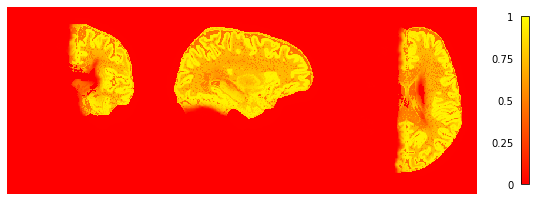

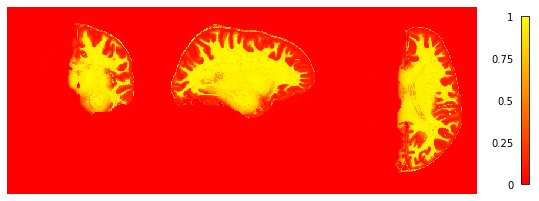

In [3]:
if not skip_plots:
    plotting.plot_img(cortex['region_proba'],
        vmin=0, vmax=1, cmap='autumn', colorbar=True,
        annotate=False, draw_cross=False)
    plotting.plot_img(cortex['inside_proba'],
        vmin=0, vmax=1, cmap='autumn', colorbar=True,
        annotate=False, draw_cross=False)

### CRUISE

In [4]:
cruise = nighres.cortex.cruise_cortex_extraction(
                        init_image=cortex['inside_mask'],
                        wm_image=cortex['inside_proba'],
                        gm_image=cortex['region_proba'],
                        csf_image=cortex['background_proba'],
                        normalize_probabilities=True,
                        save_data=True,
                        file_name="sub001_sess1_right_cerebrum",
                        output_dir=out_dir)


CRUISE Cortical Extraction

Outputs will be saved to /home/cons/python/nighres_examples/cortical_depth_estimation/
Opening LUT: java.io.FileInputStream@6433a2
Simple points: 25985144
Opening LUT: java.io.FileInputStream@306a30c7
Simple points: 25985144
fast marching init
done
GDM forces: 0.0 (edges), 0.4 (balloon), 0.1 (curvature), 0.0 (divergence)
Opening LUT: java.io.FileInputStream@5ce65a89
Simple points: 7985920
initial GDM decomposition
fast marching
init
done
initialization
level set segmentation...
level set evolution: narrow band
init (1365245)
iteration 0
changed labels: 0 (0.0 % of boundary)
iteration 1
changed labels: 18 (0.00750516 % of boundary)
iteration 2
changed labels: 511 (0.21306317 % of boundary)
iteration 3
changed labels: 2597 (1.0828278 % of boundary)
iteration 4
changed labels: 3452 (1.439323 % of boundary)
iteration 5
changed labels: 3692 (1.5393916 % of boundary)
iteration 6
changed labels: 3447 (1.4372381 % of boundary)
iteration 7
changed labels: 3216 (1.34

changed labels: 13003 (4.2838273 % of boundary)
iteration 17
changed labels: 12329 (4.061778 % of boundary)
iteration 18
changed labels: 12015 (3.9583313 % of boundary)
iteration 19
changed labels: 11985 (3.948448 % of boundary)
iteration 20
changed labels: 11922 (3.9276924 % of boundary)
iteration 21
changed labels: 11220 (3.6964192 % of boundary)
iteration 22
changed labels: 11041 (3.6374478 % of boundary)
iteration 23
changed labels: 10555 (3.4773357 % of boundary)
iteration 24
changed labels: 10124 (3.335343 % of boundary)
iteration 25
changed labels: 10113 (3.331719 % of boundary)
iteration 26
changed labels: 9581 (3.1564522 % of boundary)
iteration 27
changed labels: 9084 (2.9927158 % of boundary)
iteration 28
changed labels: 8837 (2.911342 % of boundary)
iteration 29
changed labels: 8493 (2.7980115 % of boundary)
iteration 30
changed labels: 8363 (2.755183 % of boundary)
iteration 31
changed labels: 8058 (2.654701 % of boundary)
iteration 32
changed labels: 7688 (2.532805 % of b

changed labels: 807 (0.20754144 % of boundary)
iteration 149
changed labels: 784 (0.20162638 % of boundary)
iteration 150
changed labels: 858 (0.22065744 % of boundary)
iteration 151
changed labels: 809 (0.2080558 % of boundary)
iteration 152
changed labels: 813 (0.2090845 % of boundary)
iteration 153
changed labels: 791 (0.20342663 % of boundary)
iteration 154
changed labels: 806 (0.20728426 % of boundary)
iteration 155
changed labels: 720 (0.18516709 % of boundary)
iteration 156
changed labels: 745 (0.1915965 % of boundary)
iteration 157
changed labels: 765 (0.19674003 % of boundary)
iteration 158
changed labels: 750 (0.19288239 % of boundary)
iteration 159
changed labels: 775 (0.1993118 % of boundary)
iteration 160
changed labels: 751 (0.19313957 % of boundary)
iteration 161
changed labels: 746 (0.19185367 % of boundary)
iteration 162
changed labels: 705 (0.18130943 % of boundary)
iteration 163
changed labels: 719 (0.18490991 % of boundary)
iteration 164
changed labels: 747 (0.19211

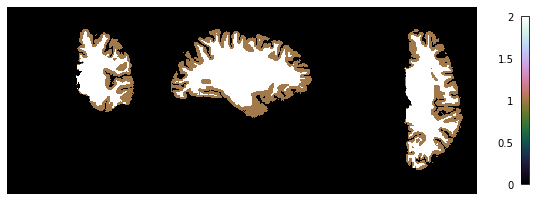

In [5]:
if not skip_plots:
    plotting.plot_img(cruise['cortex'],
                      vmin=0, vmax=2, cmap='cubehelix',  colorbar=True,
                      annotate=False,  draw_cross=False)

### Volumetric layering

In [7]:
depth = nighres.laminar.volumetric_layering(
                        inner_levelset=cruise['gwb'],
                        outer_levelset=cruise['cgb'],
                        n_layers=4,
                        save_data=True,
                        file_name="sub001_sess1_right_cerebrum",
                        output_dir=out_dir)


Volumetric Layering

Outputs will be saved to /home/cons/python/nighres_examples/cortical_depth_estimation/
initialize levelset functions and computation area...
inner curvature (3)...
outer curvature (3)...
distance-preserving evolution
GDM forces: 0.9 (balloon), 0.1 (smoothing)
initial GDM decomposition
initialization
1-th layer estimation...
level set evolution: narrow band
init (1592318)
iteration 0
changed labels: 43818 (12.444796 % of boundary)
critical points (0)
iteration 1
changed labels: 44714 (12.699268 % of boundary)
critical points (0)
iteration 2
changed labels: 28384 (8.061369 % of boundary)
critical points (0)
iteration 3
changed labels: 20006 (5.6819243 % of boundary)
critical points (0)
iteration 4
changed labels: 13582 (3.8574378 % of boundary)
critical points (0)
iteration 5
changed labels: 9504 (2.699241 % of boundary)
critical points (0)
iteration 6
changed labels: 6704 (1.90401 % of boundary)
critical points (0)
iteration 7
changed labels: 4612 (1.3098589 % of b

changed labels: 1981 (0.5479778 % of boundary)
critical points (0)
iteration 10
changed labels: 1390 (0.38449728 % of boundary)
critical points (0)
iteration 11
changed labels: 983 (0.27191427 % of boundary)
critical points (0)
iteration 12
changed labels: 706 (0.19529143 % of boundary)
critical points (0)
iteration 13
changed labels: 492 (0.13609545 % of boundary)
critical points (0)
iteration 14
changed labels: 334 (0.09239 % of boundary)
critical points (0)
iteration 15
changed labels: 265 (0.07330344 % of boundary)
critical points (0)
iteration 16
changed labels: 191 (0.052833803 % of boundary)
critical points (0)
re-initialization
level set evolution: iso-surface reinit
fast marching
init
done
iteration 17
changed labels: 385 (0.10263301 % of boundary)
critical points (0)
iteration 18
changed labels: 89 (0.023725552 % of boundary)
critical points (0)
level set evolution: iso-surface reinit
fast marching
init
done
3-th layer estimation...
level set evolution: narrow band
init (1766

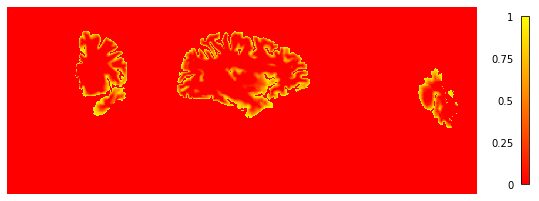

In [8]:
if not skip_plots:
    plotting.plot_img(depth['depth'],
                      vmin=0, vmax=1, cmap='autumn',  colorbar=True,
                      annotate=False,  draw_cross=False)

## sub002_sess1

In [9]:
segmentation = os.path.join(in_dir, 'sub002_sess1_mgdm-seg.nii.gz')
boundary_dist = os.path.join(in_dir, 'sub002_sess1_mgdm-dist.nii.gz')
max_labels = os.path.join(in_dir, 'sub002_sess1_mgdm-lbls.nii.gz')
max_probas = os.path.join(in_dir, 'sub002_sess1_mgdm-mems.nii.gz')
cortex2 = nighres.brain.extract_brain_region(segmentation=segmentation,
                                            levelset_boundary=boundary_dist,
                                            maximum_membership=max_probas,
                                            maximum_label=max_labels,
                                            extracted_region='right_cerebrum',
                                            save_data=True,
                                            file_name='sub002_sess1_right_cerebrum',
                                            output_dir=out_dir)


Extract Brain Region

Outputs will be saved to /home/cons/python/nighres_examples/cortical_depth_estimation/
Load atlas
loading atlas file: /home/cons/.local/lib/python3.8/site-packages/nighres/atlases/brain-segmentation-prior3.0/brain-atlas-3.0.3.txt
Structures 
Background (mask)	1
Dura (wm)	50
Arteries (wm)	8
Sulcal-CSF (csf)	10
VentricleL (csf)	11
VentricleR (csf)	12
Ventricle3 (csf)	13
Ventricle4 (csf)	14
ChoroidPlexusL (gm)	17
ChoroidPlexusR (gm)	18
Sinuses (gm)	20
Cerebellum-GM (gm)	25
Cerebrum-GML (gm)	26
Cerebrum-GMR (gm)	27
AmygdalaL (gm)	30
AmygdalaR (gm)	31
CaudateL (gm)	32
CaudateR (gm)	33
HippocampusL (gm)	34
HippocampusR (gm)	35
PutamenL (gm)	36
PutamenR (gm)	37
ThalamusL (wm)	38
ThalamusR (wm)	39
GlobusPallidusL (wm)	40
GlobusPallidusR (wm)	41
Brainstem (wm)	43
Cerebellum-WM (wm)	46
Cerebrum-WML (wm)	47
Cerebrum-WMR (wm)	48

Shape: Background
Shape: Dura
Shape: Arteries
Shape: Sulcal-CSF
Shape: VentricleL
Shape: VentricleR
Shape: Ventricle3
Shape: Ventricle4
Shape: Chor

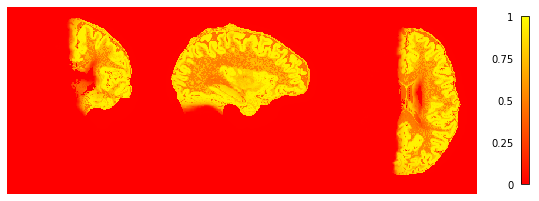

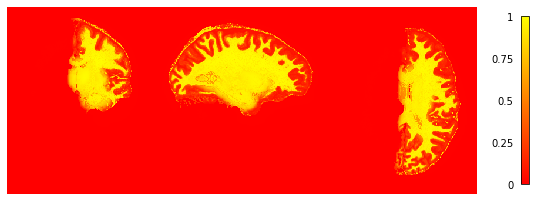

In [10]:
if not skip_plots:
    plotting.plot_img(cortex2['region_proba'],
        vmin=0, vmax=1, cmap='autumn', colorbar=True,
        annotate=False, draw_cross=False)
    plotting.plot_img(cortex2['inside_proba'],
        vmin=0, vmax=1, cmap='autumn', colorbar=True,
        annotate=False, draw_cross=False)

In [11]:
cruise2 = nighres.cortex.cruise_cortex_extraction(
                        init_image=cortex2['inside_mask'],
                        wm_image=cortex2['inside_proba'],
                        gm_image=cortex2['region_proba'],
                        csf_image=cortex2['background_proba'],
                        normalize_probabilities=True,
                        save_data=True,
                        file_name="sub002_sess1_right_cerebrum",
                        output_dir=out_dir)


CRUISE Cortical Extraction

Outputs will be saved to /home/cons/python/nighres_examples/cortical_depth_estimation/
Opening LUT: java.io.FileInputStream@51521cc1
Simple points: 25985144
Opening LUT: java.io.FileInputStream@1b4fb997
Simple points: 25985144
fast marching init
done
GDM forces: 0.0 (edges), 0.4 (balloon), 0.1 (curvature), 0.0 (divergence)
Opening LUT: java.io.FileInputStream@deb6432
Simple points: 7985920
initial GDM decomposition
fast marching
init
done
initialization
level set segmentation...
level set evolution: narrow band
init (1294828)
iteration 0
changed labels: 0 (0.0 % of boundary)
iteration 1
changed labels: 54 (0.02403322 % of boundary)
iteration 2
changed labels: 721 (0.32088798 % of boundary)
iteration 3
changed labels: 2425 (1.0792696 % of boundary)
iteration 4
changed labels: 3061 (1.3623275 % of boundary)
iteration 5
changed labels: 3094 (1.3770144 % of boundary)
iteration 6
changed labels: 2906 (1.2933432 % of boundary)
iteration 7
changed labels: 2662 (1.

iteration 20
changed labels: 11063 (3.9742641 % of boundary)
iteration 21
changed labels: 10910 (3.9193006 % of boundary)
iteration 22
changed labels: 10529 (3.7824302 % of boundary)
iteration 23
changed labels: 10214 (3.66927 % of boundary)
iteration 24
changed labels: 9979 (3.5848486 % of boundary)
iteration 25
changed labels: 9529 (3.4231913 % of boundary)
iteration 26
changed labels: 9464 (3.3998404 % of boundary)
iteration 27
changed labels: 9019 (3.2399788 % of boundary)
iteration 28
changed labels: 8785 (3.155917 % of boundary)
iteration 29
changed labels: 8527 (3.0632334 % of boundary)
iteration 30
changed labels: 8437 (3.0309017 % of boundary)
iteration 31
changed labels: 8075 (2.9008572 % of boundary)
iteration 32
changed labels: 7854 (2.8214653 % of boundary)
iteration 33
changed labels: 7755 (2.7859006 % of boundary)
iteration 34
changed labels: 7548 (2.711538 % of boundary)
iteration 35
changed labels: 6930 (2.4895282 % of boundary)
iteration 36
changed labels: 7040 (2.529

changed labels: 768 (0.21075508 % of boundary)
iteration 153
changed labels: 742 (0.20362015 % of boundary)
iteration 154
changed labels: 757 (0.20773646 % of boundary)
iteration 155
changed labels: 735 (0.20169921 % of boundary)
iteration 156
changed labels: 667 (0.18303859 % of boundary)
iteration 157
changed labels: 731 (0.20060153 % of boundary)
iteration 158
changed labels: 749 (0.2055411 % of boundary)
iteration 159
changed labels: 701 (0.19236891 % of boundary)
iteration 160
changed labels: 683 (0.18742934 % of boundary)
iteration 161
changed labels: 652 (0.1789223 % of boundary)
iteration 162
changed labels: 676 (0.1855084 % of boundary)
iteration 163
changed labels: 698 (0.19154565 % of boundary)
iteration 164
changed labels: 650 (0.17837346 % of boundary)
iteration 165
changed labels: 677 (0.1857828 % of boundary)
iteration 166
changed labels: 669 (0.18358745 % of boundary)
iteration 167
changed labels: 695 (0.19072238 % of boundary)
iteration 168
changed labels: 629 (0.17261

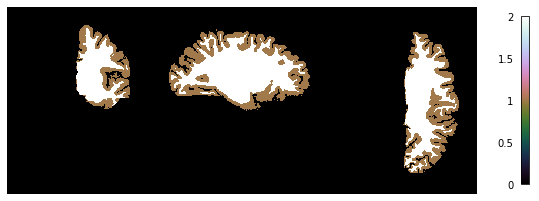

In [12]:
if not skip_plots:
    plotting.plot_img(cruise2['cortex'],
                      vmin=0, vmax=2, cmap='cubehelix',  colorbar=True,
                      annotate=False,  draw_cross=False)

In [13]:
depth2 = nighres.laminar.volumetric_layering(
                        inner_levelset=cruise2['gwb'],
                        outer_levelset=cruise2['cgb'],
                        n_layers=4,
                        save_data=True,
                        file_name="sub002_sess1_right_cerebrum",
                        output_dir=out_dir)


Volumetric Layering

Outputs will be saved to /home/cons/python/nighres_examples/cortical_depth_estimation/
initialize levelset functions and computation area...
inner curvature (3)...
outer curvature (3)...
distance-preserving evolution
GDM forces: 0.9 (balloon), 0.1 (smoothing)
initial GDM decomposition
initialization
1-th layer estimation...
level set evolution: narrow band
init (1487140)
iteration 0
changed labels: 40799 (12.7058525 % of boundary)
critical points (0)
iteration 1
changed labels: 42481 (13.22967 % of boundary)
critical points (0)
iteration 2
changed labels: 27445 (8.547075 % of boundary)
critical points (0)
iteration 3
changed labels: 19110 (5.9513426 % of boundary)
critical points (0)
iteration 4
changed labels: 13099 (4.079364 % of boundary)
critical points (0)
iteration 5
changed labels: 8888 (2.7679505 % of boundary)
critical points (0)
iteration 6
changed labels: 6160 (1.9183817 % of boundary)
critical points (0)
iteration 7
changed labels: 4270 (1.3297873 % of

changed labels: 482 (0.14322604 % of boundary)
critical points (0)
iteration 14
changed labels: 343 (0.10192225 % of boundary)
critical points (0)
iteration 15
changed labels: 294 (0.08736193 % of boundary)
critical points (0)
iteration 16
changed labels: 191 (0.056755543 % of boundary)
critical points (0)
iteration 17
changed labels: 130 (0.038629428 % of boundary)
critical points (0)
re-initialization
level set evolution: iso-surface reinit
fast marching
init
done
level set evolution: iso-surface reinit
fast marching
init
done
3-th layer estimation...
level set evolution: narrow band
init (1674812)
iteration 0
changed labels: 58200 (16.581198 % of boundary)
critical points (0)
iteration 1
changed labels: 43023 (12.257265 % of boundary)
critical points (0)
iteration 2
changed labels: 29492 (8.402279 % of boundary)
critical points (0)
iteration 3
changed labels: 19488 (5.552137 % of boundary)
critical points (0)
iteration 4
changed labels: 13073 (3.7245014 % of boundary)
critical point

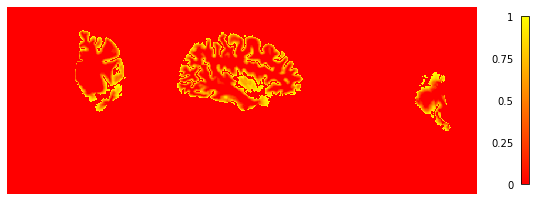

In [14]:
if not skip_plots:
    plotting.plot_img(depth2['depth'],
                      vmin=0, vmax=1, cmap='autumn',  colorbar=True,
                      annotate=False,  draw_cross=False)